# Airline Passenger Satisfaction

### About Dataset
This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? Can you predict passenger satisfaction?

### Content
Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

pd.set_option("display.max_columns",50)
pd.set_option("display.max_rows",500)

import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score,\
confusion_matrix,cohen_kappa_score,roc_auc_score,roc_curve

In [2]:
train=pd.read_csv(r"C:\Users\hp\Downloads\archive (9)\train.csv")
test=pd.read_csv(r"C:\Users\hp\Downloads\archive (9)\test.csv")
df=pd.concat([train,test],ignore_index=True)
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
df.drop(columns=['Unnamed: 0','id'],inplace=True)

In [4]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
print('No. of Rows',df.shape[0])
print('No. of Variables',df.shape[1])
print()
print("Number Columns:",df.select_dtypes(np.number).columns.values)
print()
print("Categorical Columns:",df.select_dtypes('object').columns.values)

No. of Rows 129880
No. of Variables 23

Number Columns: ['Age' 'Flight Distance' 'Inflight wifi service'
 'Departure/Arrival time convenient' 'Ease of Online booking'
 'Gate location' 'Food and drink' 'Online boarding' 'Seat comfort'
 'Inflight entertainment' 'On-board service' 'Leg room service'
 'Baggage handling' 'Checkin service' 'Inflight service' 'Cleanliness'
 'Departure Delay in Minutes' 'Arrival Delay in Minutes']

Categorical Columns: ['Gender' 'Customer Type' 'Type of Travel' 'Class' 'satisfaction']


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.0,844.0,1744.0,4983.0
Inflight wifi service,129880.0,2.728696,1.329340,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129880.0,3.057599,1.526741,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,129880.0,2.756876,1.401740,0.0,2.0,3.0,4.0,5.0
Gate location,129880.0,2.976925,1.278520,0.0,2.0,3.0,4.0,5.0
Food and drink,129880.0,3.204774,1.329933,0.0,2.0,3.0,4.0,5.0
Online boarding,129880.0,3.252633,1.350719,0.0,2.0,3.0,4.0,5.0
Seat comfort,129880.0,3.441361,1.319289,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,129880.0,3.358077,1.334049,0.0,2.0,4.0,4.0,5.0


In [7]:
cat_cols=['Gender','Customer Type','Type of Travel','Class','satisfaction']
for i in cat_cols:
    print(i)
    print(df[i].value_counts()*100/len(df),end='\n*******************\n')

Gender
Female    50.738374
Male      49.261626
Name: Gender, dtype: float64
*******************
Customer Type
Loyal Customer       81.690791
disloyal Customer    18.309209
Name: Customer Type, dtype: float64
*******************
Type of Travel
Business travel    69.058362
Personal Travel    30.941638
Name: Type of Travel, dtype: float64
*******************
Class
Business    47.859563
Eco         44.894518
Eco Plus     7.245919
Name: Class, dtype: float64
*******************
satisfaction
neutral or dissatisfied    56.553742
satisfied                  43.446258
Name: satisfaction, dtype: float64
*******************


In [8]:
#Check Data Types
df.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [9]:
#These are satisfaction levels so these columns should be categorical
cols=['Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location','Food and drink',
      'Online boarding','Seat comfort','Inflight entertainment','On-board service','Leg room service','Baggage handling',
      'Checkin service','Inflight service','Cleanliness']

In [10]:
for i in cols:
    df[i]=df[i].astype('object')

In [11]:
#a) #There are missing values in 'Arrival Delay in Minutes'
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [12]:
# Missing Value Treatment- impute it with 'median'
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(),inplace=True)

In [13]:
num_cols=df.select_dtypes(np.number).columns.values
cat_cols=df.select_dtypes('object').columns.values

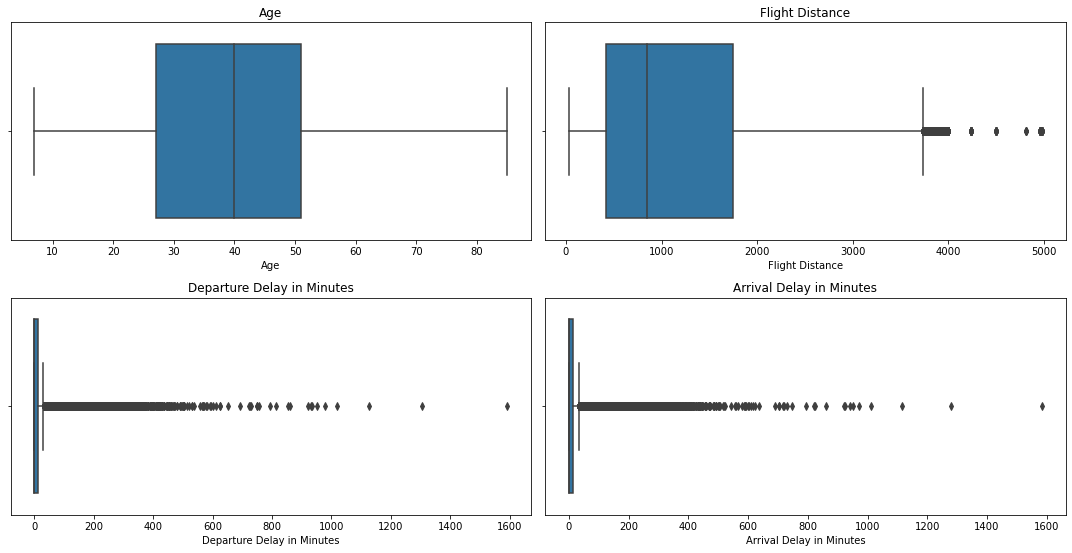

In [14]:
#b) #There are outliers in Flight Distance, Departure Delay in Minutes, Arrival Delay in Minutes,Checkin Service 
plt.figure(figsize=(15,15))
t=1
for col in num_cols:
    plt.subplot(4,2,t)
    sns.boxplot(df[col])
    t+=1
    plt.title(col)
plt.tight_layout()

In [15]:
# IQR
for i in ['Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']:
    q1,q3=np.quantile(df[i],[0.25,0.75])
    iqr=q3-q1
    ul=q3+1.5*iqr
    ll=q1-1.5*iqr
    df=df[~((df[i]>ul)|(df[i]<ll))]

In [16]:
df.shape

(94256, 23)

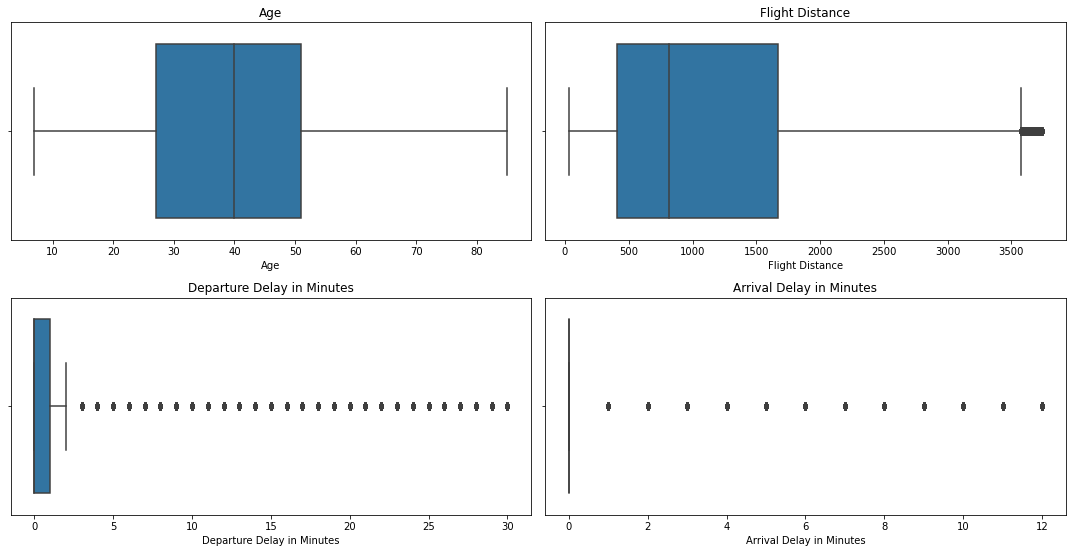

In [17]:
plt.figure(figsize=(15,15))
t=1
for col in num_cols:
    plt.subplot(4,2,t)
    sns.boxplot(df[col])
    t+=1
    plt.title(col)
plt.tight_layout()

In [18]:
Check if the target is distributed evenly.
#Is it a defect? If yes, what steps are being taken to rectify the problem?
target_dist=df.satisfaction.value_counts().to_frame()
target_dist['Percentage']=df.satisfaction.value_counts()*100/len(df)
target_dist

,satisfaction,Percentage
neutral or dissatisfied,51570,54.712697
satisfied,42686,45.287303


In [19]:
# We can observe it's only 45-55% imbalance, so it is not much of a problem. 
# But to avoid problems we can use ADASYN or RandomOverSampler techniques to address class imbalance.

In [20]:
from imblearn.over_sampling import RandomOverSampler,ADASYN

In [21]:
X=df.drop(columns='satisfaction')
y=df['satisfaction']
rs = RandomOverSampler(random_state=42)
X_resampled, y_resampled = rs.fit_resample(X, y)

In [22]:
y_resampled.value_counts() #balanced

neutral or dissatisfied    51570
satisfied                  51570
Name: satisfaction, dtype: int64

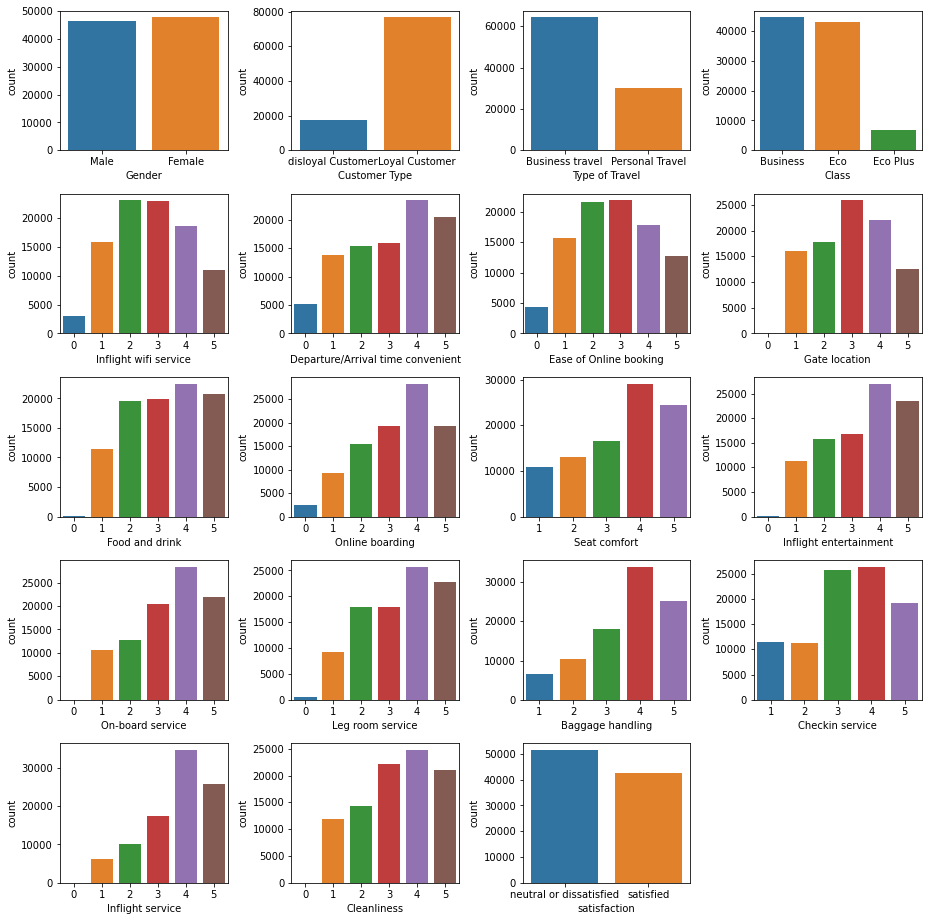

In [23]:
#a)
plt.figure(figsize=(13,15))
t=1
for col in cat_cols:
    plt.subplot(6,4,t)
    sns.countplot(df[col])
    t+=1
plt.tight_layout()

#### Inferences:
* We have more 'Loyal Customers'.
* Major categories have rating 4.
* Inclass wifi service, food and drink, Ease of online booking services should be improved.

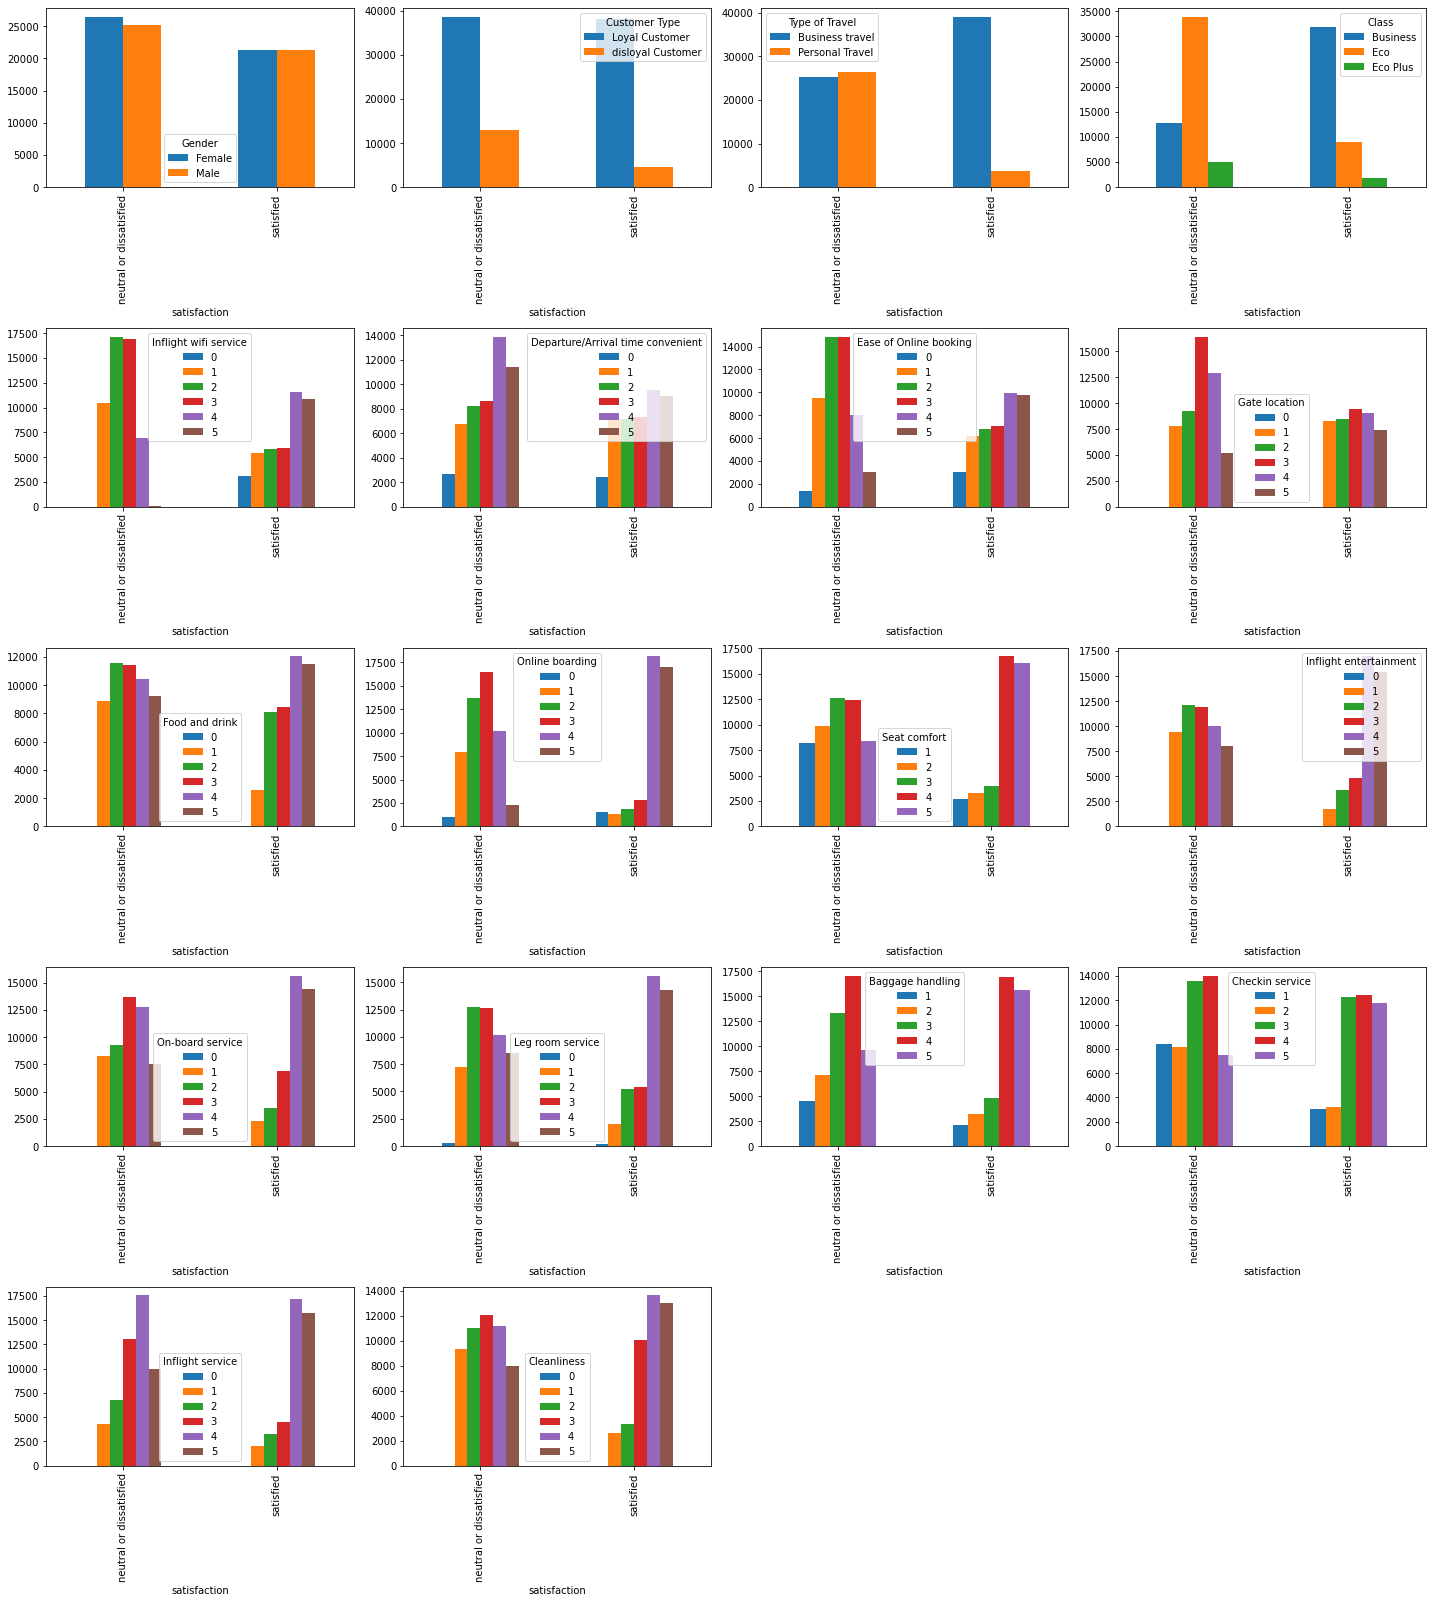

In [25]:
plt.figure(figsize=(20,25))
t=1
for col in cat_cols[:-1]:
    plt.subplot(6,4,t)
    pd.crosstab(df['satisfaction'],df[col]).plot(kind='bar',ax=plt.gca())
    t+=1
plt.tight_layout()
plt.show()

#### Inference
* People travelling in 'Business' are satisfied and people travelling in 'Eco' are neutral or dissatisfied.

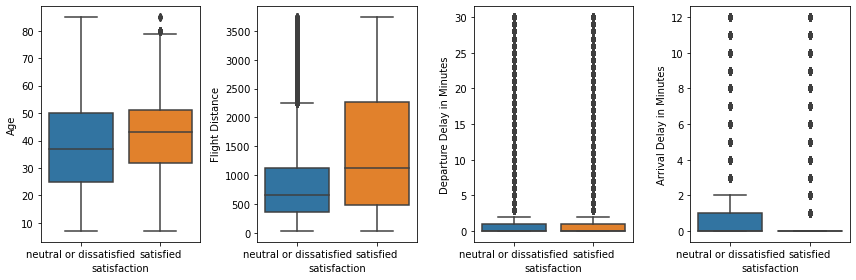

In [27]:
plt.figure(figsize=(12,4))
t=1
for col in num_cols:
    plt.subplot(1,4,t)
    sns.boxplot(df['satisfaction'],df[col])
    t+=1
plt.tight_layout()

In [28]:
# Test to check the the relationship of Target with Categorical columns (Category vs Category)- Chi-Square
for i in cat_cols:
    obs_values=pd.crosstab(df['satisfaction'],df[i]).values
    t,pval,dof,exp_values=stats.chi2_contingency(obs_values)
    if pval<0.05:
        print(f'Target and {i} are related')
    else:
        print(f'Target and {i} are independent')

Target and Gender are related
Target and Customer Type are related
Target and Type of Travel are related
Target and Class are related
Target and Inflight wifi service are related
Target and Departure/Arrival time convenient are related
Target and Ease of Online booking are related
Target and Gate location are related
Target and Food and drink are related
Target and Online boarding are related
Target and Seat comfort are related
Target and Inflight entertainment are related
Target and On-board service are related
Target and Leg room service are related
Target and Baggage handling are related
Target and Checkin service are related
Target and Inflight service are related
Target and Cleanliness are related
Target and satisfaction are related


In [29]:
#to check the dependency of target with number columns: (category vs number)- ANOVA
group1 = df[df['satisfaction'] == 'neutral or dissatisfied']
group2 = df[df['satisfaction'] == 'satisfied']

In [30]:
for i in num_cols:
    fstat, pval = stats.f_oneway(group1[i], group2[i])
    if pval<0.05:
        print(f'Target and {i} are related')
    else:
        print(f'Target and {i} are independent')

Target and Age are related
Target and Flight Distance are related
Target and Departure Delay in Minutes are related
Target and Arrival Delay in Minutes are related


In [31]:
#Encoding the categorical Variables

In [32]:
df.describe(include='object').T

,count,unique,top,freq
Gender,94256,2,Female,47781
Customer Type,94256,2,Loyal Customer,76770
Type of Travel,94256,2,Business travel,64309
Class,94256,3,Business,44572
Inflight wifi service,94256,6,2,23028
Departure/Arrival time convenient,94256,6,4,23418
Ease of Online booking,94256,6,3,21917
Gate location,94256,6,3,25895
Food and drink,94256,6,4,22519
Online boarding,94256,6,4,28366


In [33]:
cols=['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness']

In [34]:
for i in cols:
    f=df[i].value_counts(normalize=True).to_dict()
    df[i]=df[i].map(f)

In [38]:
#Scaling
for i in num_cols:
    sc=StandardScaler()
    df[i]=sc.fit_transform(pd.DataFrame(df[i]))

In [39]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
1,Male,disloyal Customer,-0.950874,Business travel,Business,-0.968353,0.242404,0.163226,0.232526,0.274731,0.121573,0.205175,0.115908,0.118889,0.111579,0.241873,0.191669,0.120809,0.367860,0.126899,-0.244932,1.567134,neutral or dissatisfied
2,Female,Loyal Customer,-0.884977,Business travel,Business,0.010578,0.244313,0.163226,0.229036,0.188115,0.219678,0.204305,0.259156,0.248727,0.301615,0.190990,0.360423,0.280544,0.367860,0.222691,-0.448829,-0.466483,satisfied
3,Female,Loyal Customer,-0.950874,Business travel,Business,-0.615420,0.244313,0.217249,0.135291,0.133456,0.208241,0.164785,0.139567,0.167130,0.135864,0.241873,0.191669,0.120809,0.367860,0.152234,1.794042,2.583942,neutral or dissatisfied
4,Male,Loyal Customer,1.421415,Business travel,Business,-0.991019,0.242404,0.169209,0.232526,0.274731,0.238913,0.204305,0.259156,0.178408,0.218034,0.273086,0.360423,0.273914,0.185993,0.234797,-0.448829,-0.466483,satisfied
5,Female,Loyal Customer,-0.884977,Personal Travel,Eco,0.051591,0.242404,0.248451,0.229036,0.170408,0.121573,0.164785,0.115908,0.118889,0.218034,0.273086,0.360423,0.280544,0.367860,0.126899,-0.448829,-0.466483,neutral or dissatisfied


In [40]:
X=df.drop(columns='satisfaction')
y=df['satisfaction']
X=sm.add_constant(X)
#as the data is imbalanced, we oversample the minority class
rs = RandomOverSampler(random_state=42)

X_resampled, y_resampled = rs.fit_resample(X, y)

In [41]:
X_resampled=pd.get_dummies(X_resampled,drop_first=True)

In [42]:
d={"satisfied":0,"neutral or dissatisfied":1}
y_resampled=y_resampled.map(d)

In [43]:
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
# Split the overall data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

The const distribution is not significantly different between train and test datasets.
The Age distribution is not significantly different between train and test datasets.
The Flight Distance distribution is not significantly different between train and test datasets.
The Inflight wifi service distribution is not significantly different between train and test datasets.
The Departure/Arrival time convenient distribution is not significantly different between train and test datasets.
The Ease of Online booking distribution is not significantly different between train and test datasets.
The Gate location distribution is not significantly different between train and test datasets.
The Food and drink distribution is not significantly different between train and test datasets.
The Online boarding distribution is not significantly different between train and test datasets.
The Seat comfort distribution is not significantly different between train and test datasets.
The Inflight entertainment 

### Base Model

In [46]:
base_model=sm.Logit(y_train,X_train).fit()
base_model.summary()

Optimization terminated successfully.
         Current function value: 0.274917
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           satisfaction   No. Observations:                72198
Model:                          Logit   Df Residuals:                    72174
Method:                           MLE   Df Model:                           23
Date:                Mon, 04 Sep 2023   Pseudo R-squ.:                  0.6034
Time:                        14:48:14   Log-Likelihood:                -19848.
converged:                       True   LL-Null:                       -50044.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.8952      0.142      6.307      0.000       0.617       1.173
Age                                   0.0812      0.014      5.725      0.000       0.053       0.109
Flight Distance                      -0.0181      0.015     -1.239      0.215      -0.047       0.011
Inflight wifi service                38.7339      0.448     86.530      0.000      37.856      39.611
Departure/Arrival time convenient     3.0547      0.279     10.952      0.000       2.508       3.601
Ease of Online booking               -0.8476      0.447     -1.898      0.058      -1.723       0.028
Gate location                        -4.5455      0.287    -15.811      0.000      -5.109      -3.982
Food and drink                       -2.3503      0.497     -4.732      0.000      -3.324      -1.377
Online boarding                     -11.9220      0.201    -59.333      0.000     -12.316     -11.528
Seat comfort                         -0.9413      0.242     -3.884      0.000      -1.416      -0.466
Inflight entertainment               -5.9594      0.368    -16.213      0.000      -6.680      -5.239
On-board service                     -4.6501      0.246    -18.919      0.000      -5.132      -4.168
Leg room service                    -11.4105      0.274    -41.675      0.000     -11.947     -10.874
Baggage handling                     -1.2253      0.172     -7.117      0.000      -1.563      -0.888
Checkin service                      -3.9485      0.204    -19.338      0.000      -4.349      -3.548
Inflight service                     -0.3609      0.172     -2.093      0.036      -0.699      -0.023
Cleanliness                          -2.6253      0.367     -7.145      0.000      -3.346      -1.905
Departure Delay in Minutes           -0.0154      0.014     -1.067      0.286      -0.044       0.013
Arrival Delay in Minutes              0.2027      0.014     13.996      0.000       0.174       0.231
Gender_Male                          -0.0667      0.026     -2.584      0.010      -0.117      -0.016
Customer Type_disloyal Customer       2.5494      0.041     62.577      0.000       2.470       2.629
Type of Travel_Personal Travel        2.9480      0.042     70.622      0.000       2.866       3.030
Class_Eco                             1.0698      0.035     30.839      0.000       1.002       1.138
Class_Eco Plus                        1.2587      0.058     21.843      0.000       1.146       1.372
=====================================================================================================
"""

In [47]:
y_pred_prob=base_model.predict(X_test)
y_pred = [1 if i>0.5 else 0 for i in y_pred_prob]

In [48]:
accuracy_score(y_test,y_pred)

0.8943507207032513

In [49]:
#b)
def validation(test,pred):
    print('Confusion Matrix\n',confusion_matrix(test,pred))
    print('Accuracy:',accuracy_score(test,pred))
    print('Precison:',precision_score(test,pred))
    print('Recall:',recall_score(test,pred))
    print('F1 Score:',f1_score(test,pred))
    print('Cohen kappa Score:',cohen_kappa_score(test,pred))
    print('Classification Report\n',classification_report(test,pred))

In [50]:
validation(y_test,y_pred)

Confusion Matrix
 [[13816  1681]
 [ 1588 13857]]
Accuracy: 0.8943507207032513
Precison: 0.8918136182262839
Recall: 0.8971835545483975
F1 Score: 0.8944905270632282
Cohen kappa Score: 0.7887029792238373
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.89      0.89     15497
           1       0.89      0.90      0.89     15445

    accuracy                           0.89     30942
   macro avg       0.89      0.89      0.89     30942
weighted avg       0.89      0.89      0.89     30942



In [69]:
print('Statistically significant columns: ')
for i in base_model.pvalues.to_dict():
    if base_model.pvalues.to_dict()[i]<0.05:
        print(i)

Statistically significant columns: 
const
Age
Inflight wifi service
Departure/Arrival time convenient
Gate location
Food and drink
Online boarding
Seat comfort
Inflight entertainment
On-board service
Leg room service
Baggage handling
Checkin service
Inflight service
Cleanliness
Arrival Delay in Minutes
Gender_Male
Customer Type_disloyal Customer
Type of Travel_Personal Travel
Class_Eco
Class_Eco Plus


<AxesSubplot:>

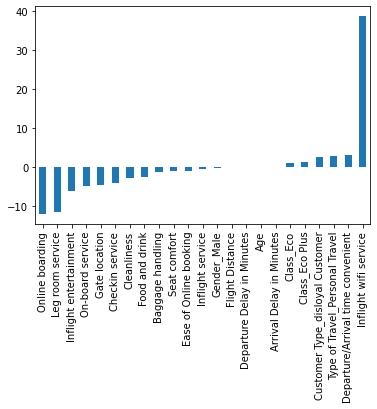

In [53]:
base_model.params[1:].sort_values().plot(kind='bar')

In [54]:
#As the kappa score for the full model (with cut-off probability 0.5) is 0.7887, 
# we can say that there is substantial agreement between the actual and predicted values.
cohen_kappa_score(y_test,y_pred)

0.7887029792238373

In [55]:
def roc_curv(test,pred):
    fpr,tpr,thres=roc_curve(test,pred)
    print('AUC:',roc_auc_score(test,pred))
    plt.plot(fpr,tpr,color='red')
    plt.plot([0, 1], [0, 1],'b--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC CURVE')

AUC: 0.8943554734734631


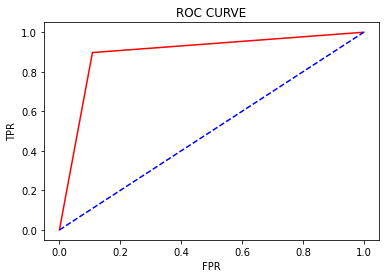

In [56]:
roc_curv(y_test,y_pred)

### We will try other algorithms to improve the accuracy of the model

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [59]:
def model_results(model,x_train,y_train,x_test,y_test):
    print(str(model))

    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
   
    validation(y_test,y_pred)
    
    y_pred_prob = model.predict_proba(x_test)[:,1]
    
    roc_curv(y_test,y_pred_prob)

KNeighborsClassifier(n_neighbors=3)
Confusion Matrix
 [[13106  2391]
 [ 2497 12948]]
Accuracy: 0.8420270182922888
Precison: 0.8441228241736749
Recall: 0.8383295564907737
F1 Score: 0.8412162162162161
Cohen kappa Score: 0.684049506257633
Classification Report
               precision    recall  f1-score   support

           0       0.84      0.85      0.84     15497
           1       0.84      0.84      0.84     15445

    accuracy                           0.84     30942
   macro avg       0.84      0.84      0.84     30942
weighted avg       0.84      0.84      0.84     30942

AUC: 0.8949654224578351


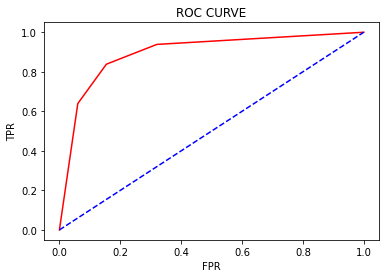

In [60]:
model_results(KNeighborsClassifier(n_neighbors=3),X_train,y_train,X_test,y_test)

DecisionTreeClassifier(max_depth=5)
Confusion Matrix
 [[13907  1590]
 [ 1238 14207]]
Accuracy: 0.9086031930709069
Precison: 0.8993479774640755
Recall: 0.9198446099061185
F1 Score: 0.9094808270917355
Cohen kappa Score: 0.8172128590554967
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.90      0.91     15497
           1       0.90      0.92      0.91     15445

    accuracy                           0.91     30942
   macro avg       0.91      0.91      0.91     30942
weighted avg       0.91      0.91      0.91     30942

AUC: 0.968345228234005


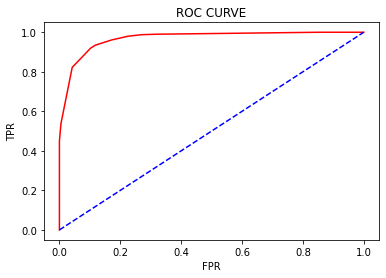

In [61]:
model_results(DecisionTreeClassifier(max_depth=5),X_train,y_train,X_test,y_test)

RandomForestClassifier(max_depth=5, n_estimators=500)
Confusion Matrix
 [[13884  1613]
 [  951 14494]]
Accuracy: 0.9171352853726327
Precison: 0.8998572049419507
Recall: 0.9384266752994497
F1 Score: 0.9187373225152129
Cohen kappa Score: 0.8342820196336962
Classification Report
               precision    recall  f1-score   support

           0       0.94      0.90      0.92     15497
           1       0.90      0.94      0.92     15445

    accuracy                           0.92     30942
   macro avg       0.92      0.92      0.92     30942
weighted avg       0.92      0.92      0.92     30942

AUC: 0.9663819204723737


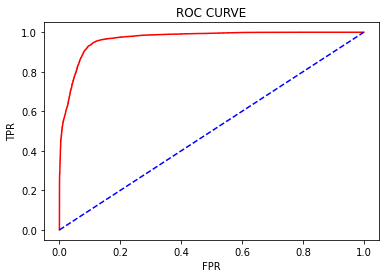

In [62]:
model_results(RandomForestClassifier(n_estimators=500,max_depth=5),X_train,y_train,X_test,y_test)

GradientBoostingClassifier(n_estimators=200)
Confusion Matrix
 [[14372  1125]
 [  702 14743]]
Accuracy: 0.9409540430482839
Precison: 0.9291025964204689
Recall: 0.9545483975396568
F1 Score: 0.9416536262894006
Cohen kappa Score: 0.8819131785669901
Classification Report
               precision    recall  f1-score   support

           0       0.95      0.93      0.94     15497
           1       0.93      0.95      0.94     15445

    accuracy                           0.94     30942
   macro avg       0.94      0.94      0.94     30942
weighted avg       0.94      0.94      0.94     30942

AUC: 0.9884352495213466


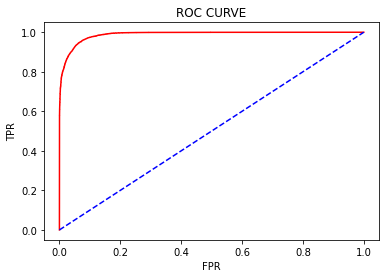

In [63]:
model_results(GradientBoostingClassifier(n_estimators=200),X_train,y_train,X_test,y_test)

In [ ]:
# Hyper-Parameter Tuning

In [84]:
# Check the paramters for models using GridSearchCV
tuned_paramaters = [{'max_depth':range(2,10),
                     #'max_features': ["sqrt", "log2"],
                     #'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10)
                    }]
                
rf = DecisionTreeClassifier(random_state = 42)

tree_grid = GridSearchCV(estimator = rf, param_grid = tuned_paramaters, cv = 5)

rf_model_tuned = tree_grid.fit(X_train, y_train)

print('Best parameters for decision tree classifier: ', rf_model_tuned.best_params_, '\n')

Best parameters for decision tree classifier:  {'max_depth': 9, 'min_samples_leaf': 2} 



DecisionTreeClassifier(max_depth=9, min_samples_leaf=2)
Confusion Matrix
 [[14346  1151]
 [  971 14474]]
Accuracy: 0.9314200762717342
Precison: 0.926336
Recall: 0.937131757850437
F1 Score: 0.9317026070164146
Cohen kappa Score: 0.8628424469851572
Classification Report
               precision    recall  f1-score   support

           0       0.94      0.93      0.93     15497
           1       0.93      0.94      0.93     15445

    accuracy                           0.93     30942
   macro avg       0.93      0.93      0.93     30942
weighted avg       0.93      0.93      0.93     30942

AUC: 0.9835810136959225


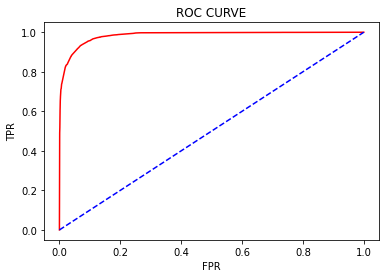

In [86]:
model_results(DecisionTreeClassifier(criterion='gini',max_depth=9,min_samples_leaf=2),X_train,y_train,X_test,y_test)

In [ ]:
#F1-Score is coming out to be good, thus our model works well in predicting whether the customer will be satisfied or not

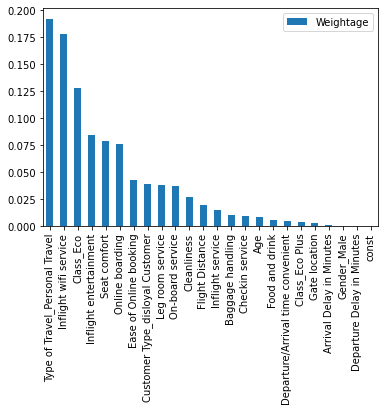

In [87]:
# Feature Selection
rf = RandomForestClassifier(max_depth=5)

# Fit the model to your data
rf.fit(X_train, y_train)

# Get feature importances
pd.DataFrame(rf.feature_importances_,rf.feature_names_in_,columns=['Weightage']).\
sort_values(by='Weightage',ascending=False).plot(kind='bar')
plt.show()

In [ ]:
# We can exclude the non-important columns from model building as they do noy effect the satisfaction rate.
# Features like :  Gender, Gate Location, Class, Age etc